# British Airways' Customers Reviews

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Really terrible user experi...
1,✅ Trip Verified | Very impressed with BA. Chec...
2,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
3,Not Verified | I flew from Malaga via LHR to...
4,✅ Trip Verified | Milan to Miami return via L...


In [ ]:
df.to_csv("sample_data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import pandas as pd

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv("sample_data/BA_reviews.csv")

# Display the first few rows to understand the structure
print(df.head())

   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |  Really terrible user experi...
1           1  ✅ Trip Verified | Very impressed with BA. Chec...
2           2  ✅ Trip Verified |  LHR - SFO, LAS - LGW August...
3           3  Not Verified |   I flew from Malaga via LHR to...
4           4  ✅ Trip Verified |  Milan to Miami return via L...


In [ ]:
unnecessary_text1 = "✅ Trip Verified |"
df['reviews'] = df['reviews'].str.replace(unnecessary_text1, "", case=False)

# Verify the changes
print(df.head())

   Unnamed: 0                                            reviews
0           0    Really terrible user experience. British Air...
1           1   Very impressed with BA. Check in online was a...
2           2    LHR - SFO, LAS - LGW August 2023 in Club Wor...
3           3  Not Verified |   I flew from Malaga via LHR to...
4           4    Milan to Miami return via London. Worst busi...


In [ ]:
unnecessary_text2 = "Not Verified |"
df['reviews'] = df['reviews'].str.replace(unnecessary_text2, "", case=False)

# Verify the changes
print(df.head())

   Unnamed: 0                                            reviews
0           0    Really terrible user experience. British Air...
1           1   Very impressed with BA. Check in online was a...
2           2    LHR - SFO, LAS - LGW August 2023 in Club Wor...
3           3     I flew from Malaga via LHR to Boston on the...
4           4    Milan to Miami return via London. Worst busi...


In [ ]:
# Step 3: Save the cleaned DataFrame back to a CSV file
df.to_csv('sample_data/cleaned_BA_reviews.csv', index=False)

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

Unnamed: 0    0
reviews       0
dtype: int64


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('sample_data/cleaned_BA_reviews.csv')

# Combine all review texts into a single string
text = ' '.join(df['reviews'])

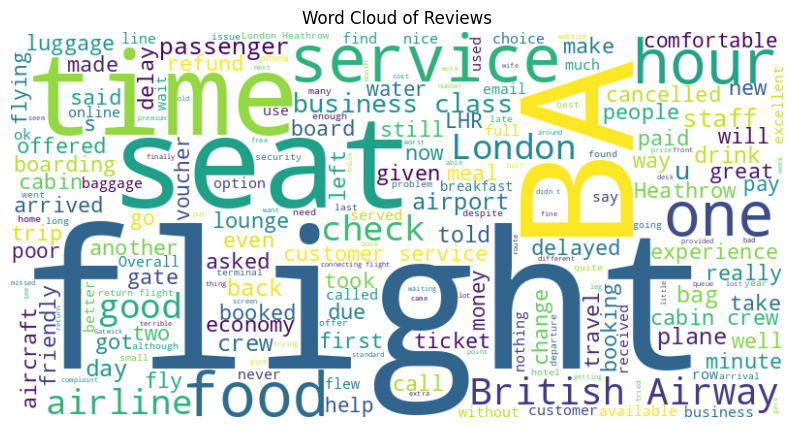

In [ ]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the CSV file into a DataFrame
df = pd.read_csv('sample_data/cleaned_BA_reviews.csv')


In [ ]:
# Define a function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the review text
df['sentiment'] = df['reviews'].apply(get_sentiment)

In [ ]:
# Classify the sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply classification
df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

# Display the first few rows with the sentiment scores and classification
print(df.head())

   Unnamed: 0                                            reviews  sentiment  \
0           0    Really terrible user experience. British Air...  -0.050000   
1           1   Very impressed with BA. Check in online was a...   0.282548   
2           2    LHR - SFO, LAS - LGW August 2023 in Club Wor...   0.081407   
3           3     I flew from Malaga via LHR to Boston on the...  -0.060417   
4           4    Milan to Miami return via London. Worst busi...  -0.247222   

  sentiment_class  
0        negative  
1        positive  
2        positive  
3        negative  
4        negative  


In [ ]:
# Count the number of positive, negative, and neutral reviews
sentiment_counts = df['sentiment_class'].value_counts()
print(sentiment_counts)

sentiment_class
positive    628
negative    362
neutral      10
Name: count, dtype: int64


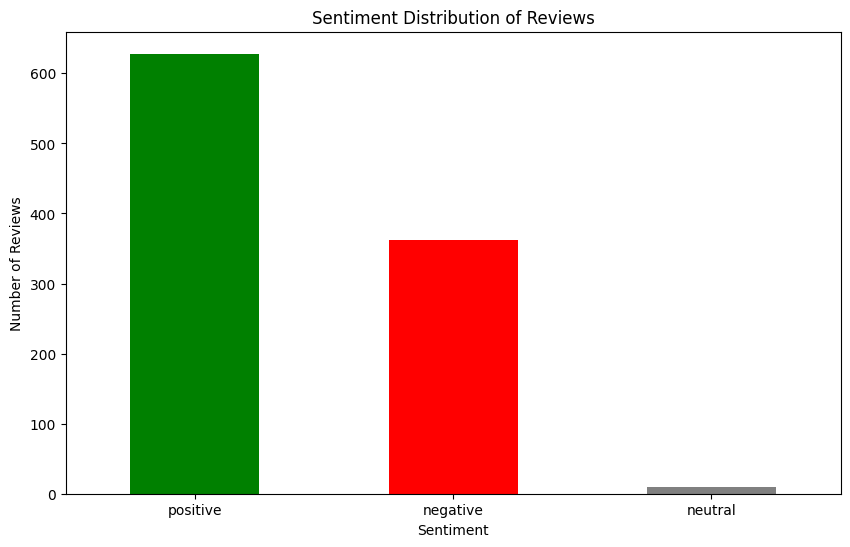

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each sentiment class
sentiment_counts = df['sentiment_class'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution of Reviews')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Calculate the percentage
total_reviews = len(df)
percentages = (sentiment_counts / total_reviews) * 100

# Display the percentages
print("Percentage of Positive Reviews: {:.2f}%".format(percentages['positive']))
print("Percentage of Negative Reviews: {:.2f}%".format(percentages['negative']))
print("Percentage of Neutral Reviews: {:.2f}%".format(percentages['neutral']))

Percentage of Positive Reviews: 62.80%
Percentage of Negative Reviews: 36.20%
Percentage of Neutral Reviews: 1.00%
